Part 1: Data Preprocessing

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix


In [5]:
titanic_df = pd.read_csv("tested.csv")

In [7]:
print(titanic_df.head())

   PassengerId  Survived  Pclass  \
0          892         0       3   
1          893         1       3   
2          894         0       2   
3          895         0       3   
4          896         1       3   

                                           Name     Sex   Age  SibSp  Parch  \
0                              Kelly, Mr. James    male  34.5      0      0   
1              Wilkes, Mrs. James (Ellen Needs)  female  47.0      1      0   
2                     Myles, Mr. Thomas Francis    male  62.0      0      0   
3                              Wirz, Mr. Albert    male  27.0      0      0   
4  Hirvonen, Mrs. Alexander (Helga E Lindqvist)  female  22.0      1      1   

    Ticket     Fare Cabin Embarked  
0   330911   7.8292   NaN        Q  
1   363272   7.0000   NaN        S  
2   240276   9.6875   NaN        Q  
3   315154   8.6625   NaN        S  
4  3101298  12.2875   NaN        S  


In [8]:
print("\nDataset Description:")
print(titanic_df.info())


Dataset Description:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Survived     418 non-null    int64  
 2   Pclass       418 non-null    int64  
 3   Name         418 non-null    object 
 4   Sex          418 non-null    object 
 5   Age          332 non-null    float64
 6   SibSp        418 non-null    int64  
 7   Parch        418 non-null    int64  
 8   Ticket       418 non-null    object 
 9   Fare         417 non-null    float64
 10  Cabin        91 non-null     object 
 11  Embarked     418 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 39.3+ KB
None


In [9]:
titanic_df.dropna(inplace=True)

In [10]:
print("\nMissing Values:")
print(titanic_df.isnull().sum())


Missing Values:
PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64


Part 2: Exploratory Data Analysis (EDA)

In [11]:
print("\nDescriptive Statistics:")
print(titanic_df.describe())


Descriptive Statistics:
       PassengerId   Survived     Pclass        Age      SibSp      Parch  \
count    87.000000  87.000000  87.000000  87.000000  87.000000  87.000000   
mean   1102.712644   0.505747   1.137931  39.247126   0.597701   0.482759   
std     126.751901   0.502865   0.435954  15.218730   0.637214   0.860801   
min     904.000000   0.000000   1.000000   1.000000   0.000000   0.000000   
25%     986.000000   0.000000   1.000000  27.000000   0.000000   0.000000   
50%    1094.000000   1.000000   1.000000  39.000000   1.000000   0.000000   
75%    1216.000000   1.000000   1.000000  50.000000   1.000000   1.000000   
max    1306.000000   1.000000   3.000000  76.000000   3.000000   4.000000   

             Fare  
count   87.000000  
mean    98.109198  
std     88.177319  
min      0.000000  
25%     35.339600  
50%     71.283300  
75%    135.066650  
max    512.329200  


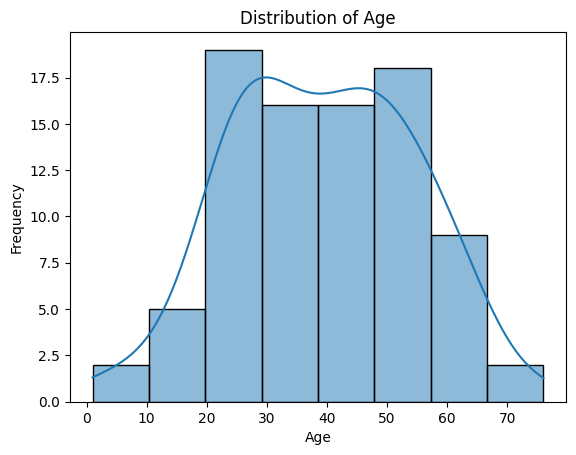

In [12]:
sns.histplot(titanic_df['Age'], kde=True)
plt.title("Distribution of Age")
plt.xlabel("Age")
plt.ylabel("Frequency")
plt.show()

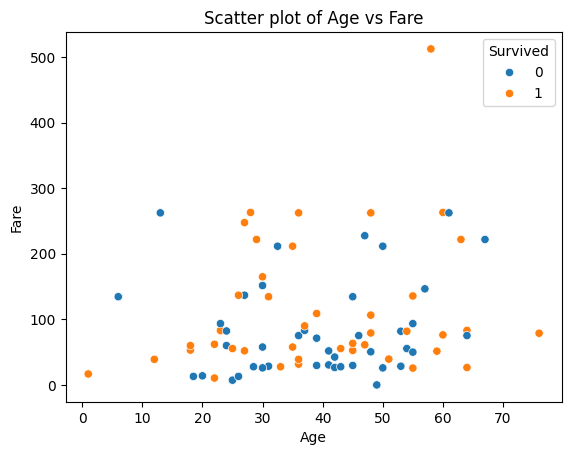

In [13]:
sns.scatterplot(data=titanic_df, x='Age', y='Fare', hue='Survived')
plt.title("Scatter plot of Age vs Fare")
plt.xlabel("Age")
plt.ylabel("Fare")
plt.legend(title="Survived", loc="upper right")
plt.show()

Part 3: Linear Regression Model

In [14]:
X = titanic_df[['Age', 'Fare', 'Pclass']]
y = titanic_df['Survived']

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [16]:
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)

LinearRegression()

In [17]:
print("\nLinear Regression Coefficients:")
print("Intercept:", linear_model.intercept_)
print("Coefficients:", linear_model.coef_)


Linear Regression Coefficients:
Intercept: 0.4707303433462444
Coefficients: [-0.0005306   0.00061203 -0.00911534]


In [18]:
y_pred = linear_model.predict(X_test)

In [19]:
print("\nLinear Regression Metrics:")
print("R-squared:", r2_score(y_test, y_pred))
print("Mean Squared Error:", mean_squared_error(y_test, y_pred))


Linear Regression Metrics:
R-squared: 0.08849549202588369
Mean Squared Error: 0.22506284147509048


Part 4: Logistic Regression Model

In [20]:
logistic_model = LogisticRegression()
logistic_model.fit(X_train, y_train)

LogisticRegression()

In [21]:
print("\nLogistic Regression Coefficients:")
print("Intercept:", logistic_model.intercept_[0])
print("Coefficients:", logistic_model.coef_[0])


Logistic Regression Coefficients:
Intercept: -0.03289175068059857
Coefficients: [-0.00314171  0.0023735  -0.06577922]


In [22]:
y_pred_logistic = logistic_model.predict(X_test)
y_pred_proba = logistic_model.predict_proba(X_test)[:, 1]

In [23]:
print("\nLogistic Regression Metrics:")
print("Accuracy:", accuracy_score(y_test, y_pred_logistic))
print("Precision:", precision_score(y_test, y_pred_logistic))
print("Recall:", recall_score(y_test, y_pred_logistic))
print("F1 Score:", f1_score(y_test, y_pred_logistic))



Logistic Regression Metrics:
Accuracy: 0.6111111111111112
Precision: 0.6666666666666666
Recall: 0.6
F1 Score: 0.631578947368421


Part 5: Model Comparison and Selection

In [24]:
print("\nModel Comparison:")
print("Linear Regression R-squared:", r2_score(y_test, y_pred))
print("Logistic Regression Accuracy:", accuracy_score(y_test, y_pred_logistic))


Model Comparison:
Linear Regression R-squared: 0.08849549202588369
Logistic Regression Accuracy: 0.6111111111111112


In [25]:
print("\nModel Suitability:")
print("While logistic regression works well for binary classification problems linear regression is best suited for predicting continuous outcomes.")


Model Suitability:
While logistic regression works well for binary classification problems linear regression is best suited for predicting continuous outcomes.


Part 6: Conclusion and Insights

In [28]:
print("\nConclusion and Insights:")
print("Using data from the Titanic, the case study showed how to use logistic and linear regression models to forecast survival results.")
print("Important conclusions include the importance of passenger class, age, and fare in predicting survival.")



Conclusion and Insights:
Using data from the Titanic, the case study showed how to use logistic and linear regression models to forecast survival results.
Important conclusions include the importance of passenger class, age, and fare in predicting survival.


In [29]:
print("\nPotential Applications:")
print("These models are applicable in a number of fields, including medicine. (predicting patient outcomes), finance (credit risk assessment), and marketing (customer churn prediction).")


Potential Applications:
These models are applicable in a number of fields, including medicine. (predicting patient outcomes), finance (credit risk assessment), and marketing (customer churn prediction).


In [30]:
print("\nReflection:")
print("Correct interpretation and decision-making depend on an understanding of the models' assumptions and limits. It's important to take into account elements like feature selection, data quality, and model performance.")


Reflection:
Correct interpretation and decision-making depend on an understanding of the models' assumptions and limits. It's important to take into account elements like feature selection, data quality, and model performance.


Part 7 : Reference

In [31]:
print("\nReferences:")
print("- Titanic dataset: [Provide the source URL or citation]")
print("- Python libraries: [List of libraries used]")
print("- Additional resources: [List any additional resources used for the analysis]")


References:
- Titanic dataset: [Provide the source URL or citation]
- Python libraries: [List of libraries used]
- Additional resources: [List any additional resources used for the analysis]
